In [130]:
import pandas as pd
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter
import numpy as np

In [134]:
mutated_genes =  pd.read_csv('Mutated_Genes.txt', sep='\t', header=0)
mutated_genes = mutated_genes.sort_values(by=['# Mut'],ascending=False)[:5].reset_index(drop = True)
mutated_genes

,Gene,MutSig(Q-value),# Mut,#,Profiled Samples,Freq,Is Cancer Gene (source: OncoKB)
0,TP53,NaN,436,357,515,69.3%,Yes
1,TTN,NaN,377,211,515,41.0%,No
2,FAT1,NaN,142,111,515,21.6%,Yes
3,MUC16,NaN,139,101,515,19.6%,No
4,CSMD3,NaN,133,97,515,18.8%,No


In [135]:
genes = np.array(mutated_genes['Gene'])

In [136]:
mut = pd.read_csv('TCGA.HNSC.mutations.txt', sep='\t', header=0, index_col = [0])
#single nucleotide polymorphisms
mut = mut[mut['Variant_Type'] == 'SNP']
mut = mut[mut['Hugo_Symbol'].isin(genes)]
mut
#pd.pivot_table(mut_variant, index=['patient_id'], columns= 'Variant_Classification', aggfunc='size', fill_value=0)

,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Variant_Classification,Variant_Type,...,SIFT,PolyPhen,DOMAINS,IMPACT,VARIANT_CLASS,FILTER,COSMIC,CALLERS,CONTEXT,NCALLERS
patient_id,,,,,,,,,,,,,,,,,,,,,
TCGA-4P-AA8J,TP53,0,.,GRCh37,17,7574000,7574000,+,Nonsense_Mutation,SNP,...,.,.,"hmmpanther:PTHR11447:SF6,hmmpanther:PTHR11447,...",HIGH,SNV,PASS,"SITE|p.E343*|c.1027G>T|8,SITE|p.E343*|c.1027G>...",SOMATICSNIPER|RADIA|MUTECT|MUSE|VARSCANS,CAGCTCTCGGA,5
TCGA-4P-AA8J,TP53,0,.,GRCh37,17,7576904,7576904,+,Silent,SNP,...,.,.,"hmmpanther:PTHR11447:SF6,hmmpanther:PTHR11447",LOW,SNV,PASS,"CODON|p.0?|c.1_1182del1182|6,BUFFER|p.Q317R|c....",MUTECT|MUSE|VARSCANS,GGAGAGGAGCT,3
TCGA-BA-4074,TP53,0,.,GRCh37,17,7577507,7577507,+,Missense_Mutation,SNP,...,deleterious(0),possibly_damaging(0.761),"hmmpanther:PTHR11447:SF6,hmmpanther:PTHR11447,...",MODERATE,SNV,PASS,"SITE|p.E258D|c.774A>T|3,SITE|p.E258D|c.774A>T|...",SOMATICSNIPER|RADIA|MUTECT|MUSE|VARSCANS,GAGTCTTCCAG,5
TCGA-BA-4074,MUC16,0,.,GRCh37,19,8966791,8966791,+,Missense_Mutation,SNP,...,.,probably_damaging(1),"Superfamily_domains:0047452,SMART_domains:SM00...",MODERATE,SNV,oxog,NONE,RADIA|MUSE|VARSCANS,CACCCCGGTGT,3
TCGA-BA-4074,CSMD3,0,.,GRCh37,8,113697694,113697694,+,Missense_Mutation,SNP,...,tolerated(0.07),benign(0.324),"PROSITE_profiles:PS01180,Gene3D:2.60.120.290,P...",MODERATE,SNV,PASS,NONE,MUTECT|RADIA|SOMATICSNIPER|MUSE|VARSCANS,CCAATCGCAGT,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-UF-A7JT,TP53,0,.,GRCh37,17,7577121,7577121,+,Missense_Mutation,SNP,...,deleterious(0),probably_damaging(0.998),"hmmpanther:PTHR11447:SF6,hmmpanther:PTHR11447,...",MODERATE,SNV,PASS,"SITE|p.R273C|c.817C>T|131,SITE|p.R273C|c.817C>...",MUTECT|MUSE,AACACGCACCT,2
TCGA-UF-A7JT,TTN,0,.,GRCh37,2,179476105,179476105,+,Missense_Mutation,SNP,...,.,.,"PROSITE_profiles:PS50853,hmmpanther:PTHR13817:...",MODERATE,SNV,PASS,NONE,MUTECT|MUSE,GTCTGGGTCTT,2
TCGA-UF-A7JV,TTN,0,.,GRCh37,2,179567232,179567232,+,Missense_Mutation,SNP,...,.,.,"PROSITE_profiles:PS50835,hmmpanther:PTHR13817:...",MODERATE,SNV,PASS,NONE,MUTECT|RADIA|SOMATICSNIPER|MUSE|VARSCANS,GCCATCATTCC,5


In [137]:
# get the count of top 5 gene in each column
mut_gene = mut[["Hugo_Symbol"]]
pd.pivot_table(mut_gene, index=['patient_id'], columns= "Hugo_Symbol", aggfunc = 'size', fill_value=0)

Hugo_Symbol,CSMD3,FAT1,MUC16,TP53,TTN
patient_id,,,,,
TCGA-4P-AA8J,0,0,0,2,0
TCGA-BA-4074,1,0,1,1,0
TCGA-BA-4075,0,0,0,1,0
TCGA-BA-4076,0,0,1,1,6
TCGA-BA-4077,0,0,0,0,1
...,...,...,...,...,...
TCGA-UF-A7JO,0,2,1,2,1
TCGA-UF-A7JS,0,0,0,2,1
TCGA-UF-A7JT,0,0,0,1,1


In [85]:
metadata = pd.read_csv('TCGA.HNSC.metadata.txt', sep='\t', header=0,index_col = [0])
#metadata = metadata[['patient_id','age_at_initial_pathologic_diagnosis','gender','race'
                    #,'ajcc_pathologic_tumor_stage', 'histological_grade', 'tumor_status',
                    #'tumor_status','OS', 'OS.time','DSS', 'DSS.time']]
metadata

,type,age_at_initial_pathologic_diagnosis,gender,race,ajcc_pathologic_tumor_stage,histological_type,histological_grade,tumor_status,vital_status,OS,OS.time,DSS,DSS.time,DFI,DFI.time,PFI,PFI.time,Redaction
patient_id,,,,,,,,,,,,,,,,,,
TCGA-4P-AA8J,HNSC,66.0,MALE,BLACK OR AFRICAN AMERICAN,Stage IVA,Head & Neck Squamous Cell Carcinoma,G2,TUMOR FREE,Alive,0.0,102.0,0.0,102.0,NaN,NaN,0.0,102.0,NaN
TCGA-BA-4074,HNSC,69.0,MALE,WHITE,Stage IVA,Head & Neck Squamous Cell Carcinoma,G3,WITH TUMOR,Dead,1.0,462.0,1.0,462.0,NaN,NaN,1.0,396.0,NaN
TCGA-BA-4075,HNSC,49.0,MALE,BLACK OR AFRICAN AMERICAN,Stage III,Head & Neck Squamous Cell Carcinoma,G2,WITH TUMOR,Dead,1.0,283.0,1.0,283.0,NaN,NaN,1.0,236.0,NaN
TCGA-BA-4076,HNSC,39.0,MALE,WHITE,[Not Available],Head & Neck Squamous Cell Carcinoma,G2,WITH TUMOR,Dead,1.0,415.0,1.0,415.0,NaN,NaN,1.0,286.0,NaN
TCGA-BA-4077,HNSC,45.0,FEMALE,WHITE,Stage IVA,Head & Neck Squamous Cell Carcinoma,G2,WITH TUMOR,Dead,1.0,1134.0,1.0,1134.0,NaN,NaN,1.0,1134.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-UF-A7JT,HNSC,72.0,FEMALE,WHITE,Stage IVA,Head & Neck Squamous Cell Carcinoma,G3,WITH TUMOR,Dead,1.0,993.0,1.0,993.0,NaN,NaN,1.0,718.0,NaN
TCGA-UF-A7JV,HNSC,62.0,FEMALE,WHITE,Stage IVA,Head & Neck Squamous Cell Carcinoma,G2,WITH TUMOR,Dead,1.0,90.0,1.0,90.0,NaN,NaN,1.0,55.0,NaN
TCGA-UP-A6WW,HNSC,58.0,MALE,WHITE,[Not Available],Head & Neck Squamous Cell Carcinoma,G2,TUMOR FREE,Alive,0.0,518.0,0.0,518.0,NaN,NaN,0.0,518.0,NaN


In [86]:
metadata.columns

Index(['type', 'age_at_initial_pathologic_diagnosis', 'gender', 'race',
       'ajcc_pathologic_tumor_stage', 'histological_type',
       'histological_grade', 'tumor_status', 'vital_status', 'OS', 'OS.time',
       'DSS', 'DSS.time', 'DFI', 'DFI.time', 'PFI', 'PFI.time', 'Redaction'],
      dtype='object')

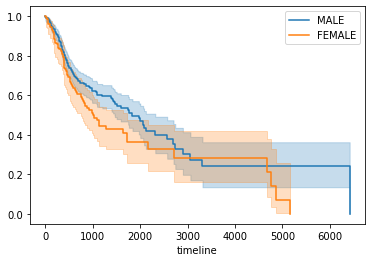

In [87]:
# Define the KaplanMeierFitter object
kmf = KaplanMeierFitter()

# Example groups could be based on gene mutation status or any other categorical variable
for group in metadata['gender'].unique():
    # Select data for the group
    df_group = metadata[metadata['gender'] == group]
    
    # Fit the model to the data
    kmf.fit(df_group['OS.time'], df_group['OS'], label=group)
    
    # Plot the survival function
    kmf.plot_survival_function()

In [110]:
meta = metadata.copy()
meta = meta.drop(columns = ['type','histological_type', 'histological_grade', 'vital_status', 'DFI', 'DFI.time', 'PFI', 'PFI.time', 'Redaction'])
#drop race which is not available or unknown or not evaluated
meta = meta[meta['race'] != '[Not Available]']
meta = meta[meta['race'] != '[Unknown]']
meta = meta[meta['race'] != '[Not Evaluated]']
meta = meta[meta['ajcc_pathologic_tumor_stage'] != '[Discrepancy]']
meta = meta[meta['ajcc_pathologic_tumor_stage'] != '[Not Available]']
meta = meta.dropna()
meta['gender'] = meta['gender'].map({'MALE': 1, 'FEMALE': 0})
meta['tumor_status'] = meta['tumor_status'].map({'TUMOR FREE': 1, 'WITH TUMOR': 0})
meta = pd.get_dummies(meta, columns=['race'], prefix='race')
meta = pd.get_dummies(meta, columns=['ajcc_pathologic_tumor_stage'], prefix='ajcc_pathologic_tumor_stage')
meta_os = meta.drop(columns = ['DSS','DSS.time'])
meta_dss = meta.drop(columns = ['OS','OS.time'])

In [111]:
meta_os

,age_at_initial_pathologic_diagnosis,gender,tumor_status,OS,OS.time,race_AMERICAN INDIAN OR ALASKA NATIVE,race_ASIAN,race_BLACK OR AFRICAN AMERICAN,race_WHITE,ajcc_pathologic_tumor_stage_Stage I,ajcc_pathologic_tumor_stage_Stage II,ajcc_pathologic_tumor_stage_Stage III,ajcc_pathologic_tumor_stage_Stage IVA,ajcc_pathologic_tumor_stage_Stage IVB,ajcc_pathologic_tumor_stage_Stage IVC
patient_id,,,,,,,,,,,,,,,
TCGA-4P-AA8J,66.0,1,1,0.0,102.0,0,0,1,0,0,0,0,1,0,0
TCGA-BA-4074,69.0,1,0,1.0,462.0,0,0,0,1,0,0,0,1,0,0
TCGA-BA-4075,49.0,1,0,1.0,283.0,0,0,1,0,0,0,1,0,0,0
TCGA-BA-4077,45.0,0,0,1.0,1134.0,0,0,0,1,0,0,0,1,0,0
TCGA-BA-5149,47.0,1,0,1.0,806.0,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-UF-A7JO,79.0,0,0,1.0,631.0,0,0,0,1,0,0,0,1,0,0
TCGA-UF-A7JS,59.0,1,0,1.0,680.0,0,0,0,1,0,0,0,1,0,0
TCGA-UF-A7JT,72.0,0,0,1.0,993.0,0,0,0,1,0,0,0,1,0,0


In [112]:
pd.unique(meta['tumor_status'])

array([1, 0])

In [113]:
#get p or z value CoxPHFitter

In [114]:
def coxfitter(data, duration, event):
    # Define the CoxPHFitter object
    cph = CoxPHFitter()
    # Fit the model to your data
    cph.fit(data, duration_col= duration, event_col=event)

    # Print the summary
    print(cph.print_summary())

In [115]:
coxfitter(meta_os[['tumor_status','OS.time', 'OS']], 'OS.time', 'OS')

<lifelines.CoxPHFitter: fitted with 393 total observations, 235 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 393
number of events observed = 158
   partial log-likelihood = -757.28
         time fit was run = 2023-05-26 07:10:06 UTC

---
               coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                            
tumor_status  -2.05       0.13       0.18            -2.39            -1.70                 0.09                 0.18

               cmp to      z      p   -log2(p)
covariate                                     
tumor_status     0.00 -11.57 <0.005     100.47
---
Concordance = 0.72
Partial AIC = 1516.56
log-likelihood ratio test = 146.71 on 1 df
-log2(p) of ll-ratio test = 109.76

None


<AxesSubplot:xlabel='timeline'>

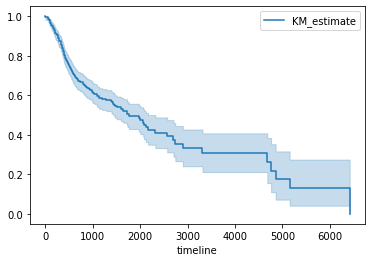

In [30]:
T = meta['OS.time']
E = meta['OS']
kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=E)
kmf.survival_function_
kmf.cumulative_density_
kmf.plot_survival_function()

<AxesSubplot:xlabel='timeline'>

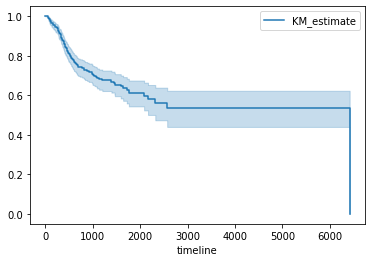

In [29]:
meta = metadata.dropna(subset=['DSS.time','DSS'])
E = meta['DSS']
T = meta['DSS.time']
kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=E)
kmf.survival_function_
kmf.cumulative_density_
kmf.plot_survival_function()

In [46]:
expression = pd.read_csv('TCGA.HNSC.expression.txt', sep='\t', header=0)
expression

,patient_id,sample_id,?|100130426,?|100133144,?|100134869,?|10357,?|10431,?|136542,?|155060,?|26823,...,ZWILCH|55055,ZWINT|11130,ZXDA|7789,ZXDB|158586,ZXDC|79364,ZYG11A|440590,ZYG11B|79699,ZYX|7791,ZZEF1|23140,ZZZ3|26009
0,TCGA-4P-AA8J,TCGA-4P-AA8J-01A-11R-A39I-07,0.0,3.1490,12.8732,122.9390,1429.060,0.0,266.2150,0.0000,...,281.861,695.116,24.6495,150.362,732.091,7.3949,419.042,11611.80,881.220,358.650
1,TCGA-BA-4074,TCGA-BA-4074-01A-01R-1436-07,0.0,12.8563,11.8081,336.1650,1927.680,0.0,39.3089,0.0000,...,2132.460,1193.140,23.8937,172.266,380.372,4.6246,805.062,2516.93,258.591,1088.320
2,TCGA-BA-4075,TCGA-BA-4075-01A-01R-1436-07,0.0,12.3168,3.7626,347.8120,1492.700,0.0,77.7167,0.0000,...,761.002,673.188,20.9031,172.049,562.240,1.6079,487.740,5930.05,292.644,980.303
3,TCGA-BA-4076,TCGA-BA-4076-01A-01R-1436-07,0.0,12.4833,4.3080,278.0170,1205.820,0.0,112.2920,0.5247,...,480.068,1032.660,47.2255,324.282,1440.900,35.1568,722.550,2674.54,672.176,998.557
4,TCGA-BA-4077,TCGA-BA-4077-01B-01R-1436-07,0.0,12.4543,11.6073,321.5450,853.706,0.0,48.1232,0.0000,...,1325.310,1620.310,44.7546,210.780,1423.000,52.9355,770.934,8035.61,763.234,692.974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,TCGA-UF-A7JV,TCGA-UF-A7JV-01A-11R-A34R-07,0.0,3.5374,14.1498,139.5330,1099.300,0.0,469.4800,0.0000,...,569.413,992.406,23.0703,234.163,832.837,0.7690,589.445,9484.19,725.175,606.364
541,TCGA-UP-A6WW,TCGA-UP-A6WW-01A-12R-A34R-07,0.0,10.6623,17.2220,107.1630,1371.560,0.0,172.8820,0.6971,...,728.379,2271.170,25.4444,156.849,747.299,332.5200,417.219,5322.41,1110.840,483.095
542,TCGA-WA-A7GZ,TCGA-WA-A7GZ-01A-11R-A34R-07,0.0,45.2095,36.0000,174.1120,626.350,0.0,204.3200,0.8639,...,548.454,1355.940,38.8769,246.652,1380.560,3.4557,549.460,3521.81,1832.830,711.447
543,TCGA-WA-A7GZ,TCGA-WA-A7GZ-11A-11R-A34R-07,0.0,55.5456,56.1361,88.2798,895.379,0.0,298.4600,0.6418,...,266.861,334.403,64.8267,319.641,1287.550,47.4968,2718.870,1535.30,1926.190,605.263
